# Facial Expression Identification Using Custom CNN Model + 3 Pre-Trained Models

## Introduction

Our facial expression indentification using pre-trained models is a deep-learning application in artificial inteligence. This project proposes to use pre-trained convolutional neural network models to recognize and categorize facial expressions such as angry, disgust, fear, happy, neutral, sad, and surpise. The initiative, which builds on prior research and improvements in transfer learning, seeks to enhance emotion indentification skills in real-world settings ranging from mental health to human-computer systems.

__Our Two Key Phases:__

_Phase 1:_ Designing and implementing a customized CNN model for facial expression indentification using TensorFlow API, Keras and Gradio.

_Phase 2:_ Experimenting with pre-trained models and having an understanding of transfer learning using TensorFlow API and Keras.

__Our Plan:__
To compare the preformance of our custom-built model to pre-trained models and access their ability to indentify facial expressions.

__Project Team:__

Hibah Hibah: 169033490

Iman Chaudhry: 210650820

Arrangan Kathir: 169042354

Tyler Rizzi: 169022274

Brandon Dang: 169026034

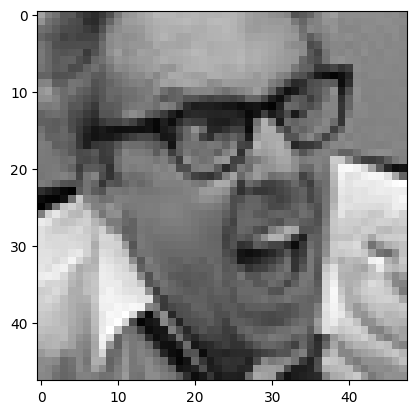

In [1]:
# Imports
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import gradio as gr
import numpy as np
import cv2
import os

# Load and display an image from the dataset
img = image.load_img("/Users/hibahchoudhry/Documents/CP468/Group Final Project/fer2013/train/angry/Training_3908.jpg")
plt.imshow(img)
plt.show()

## Data Preperation

For this project, we use the FER-2013 dataset, which is availabe on Kaggle. This dataset contains 35,887 grayscale images of faces, labeled with one of the seven expressions: happy, sad, angry, surprised, fear, disgust, or neutral. Each picture is a 48x48 pixels in size.

__Our Steps for Preperation__

__Step 1:__ _Dataset Loading:_ Loading FER-2013 dataset from Kaggle and uploading our path names to Jupyter Notebook.

__Step 2:__ _Dataset Preprocessing:_ Preprocessing the images by adjusting their pixel values and resizing them to our models required input size.

__Step 3:__ _Data Augumentation:_ Using data augumentation to boost the variety of our training data which will prevent any overfitting.

__Step 4:__ _Data Splitting:_ To analyze our models preformance, the dataset is divided in 3 sets these will be training, validation, and testing.

In [3]:
train = ImageDataGenerator(rescale=1./255,
                          rotation_range=30,
                           shear_range=0.3,
                           zoom_range=0.3,
                          horizontal_flip=True,
                           fill_mode='nearest')

validation = ImageDataGenerator(rescale=1./255)

train_dataset = train.flow_from_directory(
    '/Users/hibahchoudhry/Documents/CP468/Group Final Project/fer2013/train/',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True
)

validation_dataset = validation.flow_from_directory(
    '/Users/hibahchoudhry/Documents/CP468/Group Final Project/fer2013/test/',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## CNN Model

__Phase 1:__ Our Custom CNN Model Design and Implementation
To classify facial expressions, we built a simple CNN model with TensorFlow and Keras API. The model design starts with multiple convolutional layers, then max-pooling layers, next a flattening layer, and lastly dense layers. Our implementation attempts to provide simple knowldge of CNN and its application in image classification problems, specifically for facial expression indentification.

## Model Architecture

__Conv2D Layers:__ A convolutional process extracts features from an input picture.

__MaxPooling2D Layers:__ Reduces spatial dimentions of feature maps, lowering computational load and reuducing overfitting.

__Flatten Layer:__ Converts the 2D feature maps to 1D feature vectors in preperation for fully connecting layers.

__Dense Layers:__ Fully connected layers that conduct categorization using the extracted features.

In [30]:
# Define the CNN model
model = tf.keras.models.Sequential([
    Input(shape=(48, 48, 1)),
    
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.1), 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('custom_cnn_model_high.keras', monitor='val_loss', save_best_only=True)

# Train the model
model_fit = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=[early_stopping, checkpoint]
)

model.save_weights('custom_cnn_model.weights.h5')

Epoch 1/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 75s 82ms/step - accuracy: 0.2505 - loss: 1.8086 - val_accuracy: 0.3073 - val_loss: 1.6985
Epoch 2/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 77s 86ms/step - accuracy: 0.3075 - loss: 1.7048 - val_accuracy: 0.4170 - val_loss: 1.5023
Epoch 3/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.3835 - loss: 1.5725 - val_accuracy: 0.4649 - val_loss: 1.3892
Epoch 4/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 78s 87ms/step - accuracy: 0.4169 - loss: 1.4956 - val_accuracy: 0.4734 - val_loss: 1.3533
Epoch 5/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 73s 81ms/step - accuracy: 0.4409 - loss: 1.4410 - val_accuracy: 0.5035 - val_loss: 1.2988
Epoch 6/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 74s 82ms/step - accuracy: 0.4651 - loss: 1.3782 - val_accuracy: 0.5273 - val_loss: 1.2474
Epoch 7/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 73s 81ms/step - accuracy: 0.4782 - loss: 1.3618 - val_accuracy: 0.5348 - val_loss: 1.2351
Epoch 8/20
898/898 ━━━━━━━━━━━━━━━━━━━━ 75s 84ms/step - accuracy: 0.4956 - loss: 1.3247 - 

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


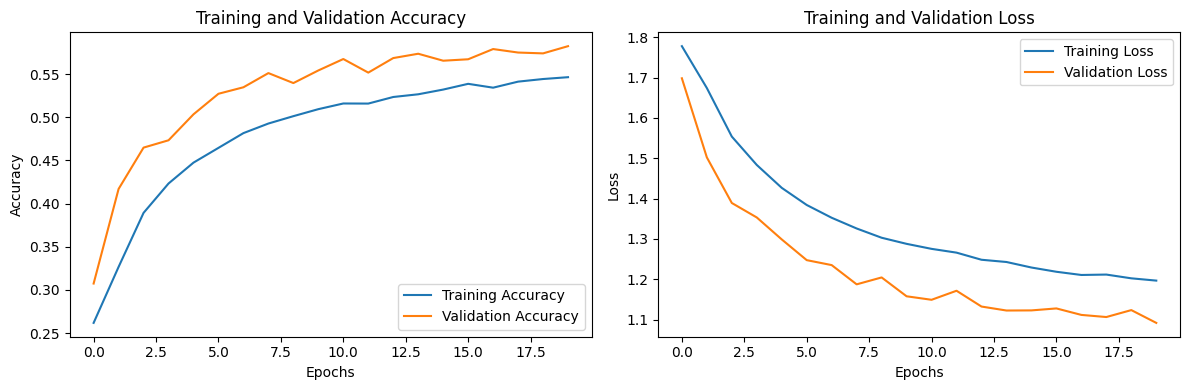

In [42]:
history = model_fit.history

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [332]:
model.save('final_custom_cnn_model.keras')

# Gradio Interface & Real Time Predictions For Our Custom CNN Model

In [3]:
model = load_model('/Users/hibahchoudhry/Documents/CP468/Group Final Project/Custom CNN Model Weights/final_custom_cnn_model.keras')

def predict(image):
    
    img_array = np.array(image) / 255.0
    img_array = tf.image.resize(img_array, [48,48])
    
    if len(img_array.shape) == 3 and img_array.shape[-1] == 3:
        img_array = img_array[:, :, 0]
        
    img_array = tf.expand_dims(img_array, axis=-1)
    img_array = tf.expand_dims(img_array, axis=0)

    preds = model.predict(img_array)

    expressions = ['angry', 'disgusted', 'in fear', 'happy', 'neutral', 'sad', 'surprised']
    pred_expression = expressions[np.argmax(preds[0])]

    return f"Our model predicts that you are {pred_expression}"


iface = gr.Interface(
    fn=predict,
    inputs=gr.Image(),
    outputs=gr.Textbox(),
    title="Facial Expression Identification with Our Custom CNN Model",
    description="Upload an image to facial expression predictions from our custom CNN Model!"
)
iface.launch()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

facial_expression_model = load_model('/Users/hibahchoudhry/Documents/CP468/Group Final Project/Custom CNN Model Weights/final_custom_cnn_model.keras', compile=False)

expression_labels = ['Angry', 'Disgusted', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']

cap = cv2.VideoCapture(0)

while True:
    ret, frame=cap.read()
    labels=[]
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w, y+h), (255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_gray=cv2.resize(roi_gray, (48,48),interpolation=cv2.INTER_AREA)
        
        roi=roi_gray.astype('float')/255.0
        roi=img_to_array(roi)
        roi=np.expand_dims(roi,axis=0)


        preds=facial_expression_model.predict(roi)[0]
        label=expression_labels[preds.argmax()]
        label_position=(x,y)

        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

    cv2.imshow('Facial Expression Identification', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 3 Pre-Trained Models and Gradio Interface

__Phase 2:__ Experimenting with Pre-Trained Models

We use pre-trained models to recognize facial expressions using transfer learning. For this project, we used fine-tuned models like VGG16, ResNet50, InceptionV3.

__VGG16__ - https://keras.io/api/applications/vgg/#vgg16-function

__ResNet50__ - https://keras.io/api/applications/resnet/#resnet50-function

__InceptionV3__ - https://keras.io/api/applications/inceptionv3/

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint

train = ImageDataGenerator(rescale=1./255,
                          rotation_range=30,
                           shear_range=0.3,
                           zoom_range=0.3,
                          horizontal_flip=True,
                           fill_mode='nearest')

validation = ImageDataGenerator(rescale=1./255)

train_dataset = train.flow_from_directory(
    '/Users/hibahchoudhry/Documents/CP468/Group Final Project/fer2013/train/',
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

validation_dataset = validation.flow_from_directory(
    '/Users/hibahchoudhry/Documents/CP468/Group Final Project/fer2013/test/',
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

# Initialize the VGG16 model without loading weights
vgg16_base = VGG16(weights=None, include_top=False, input_shape=(224, 224, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

x = vgg16_base.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

vgg16_model = Model(inputs=vgg16_base.input, outputs=predictions)

vgg16_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('pretrained_model_vgg16_high.keras', monitor='val_loss', save_best_only=True)

vgg16_history = vgg16_model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=[early_stopping, checkpoint]
)

vgg16_model.save('trained_vgg16_model.keras')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 5350s 6s/step - accuracy: 0.2430 - loss: 1.8331 - val_accuracy: 0.2537 - val_loss: 1.7948
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 6381s 7s/step - accuracy: 0.2529 - loss: 1.8028 - val_accuracy: 0.2657 - val_loss: 1.7805
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 2755s 3s/step - accuracy: 0.2566 - loss: 1.7884 - val_accuracy: 0.2598 - val_loss: 1.7619
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 2897s 3s/step - accuracy: 0.2618 - loss: 1.7809 - val_accuracy: 0.2878 - val_loss: 1.7547
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 2993s 3s/step - accuracy: 0.2669 - loss: 1.7713 - val_accuracy: 0.2835 - val_loss: 1.7442


In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint

train = ImageDataGenerator(rescale=1./255,
                           rotation_range=30,
                           shear_range=0.3,
                           zoom_range=0.3,
                           horizontal_flip=True,
                           fill_mode='nearest')

validation = ImageDataGenerator(rescale=1./255)

train_dataset = train.flow_from_directory(
    '/Users/hibahchoudhry/Documents/CP468/Group Final Project/fer2013/train/',
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

validation_dataset = validation.flow_from_directory(
    '/Users/hibahchoudhry/Documents/CP468/Group Final Project/fer2013/test/',
    target_size=(224, 224),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

# Initialize the ResNet50 model without loading weights
resnet50_base = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))

for layer in resnet50_base.layers:
    layer.trainable = False

x = resnet50_base.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

resnet50_model = Model(inputs=resnet50_base.input, outputs=predictions)

resnet50_model.compile(loss='categorical_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('pretrained_model_resnet50_high.keras', monitor='val_loss', save_best_only=True)

resnet50_history = resnet50_model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=[early_stopping, checkpoint]
)

resnet50_model.save('trained_resnet50_model.keras')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 889s 987ms/step - accuracy: 0.2291 - loss: 2.0071 - val_accuracy: 0.2471 - val_loss: 1.8213
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 890s 990ms/step - accuracy: 0.2493 - loss: 1.8275 - val_accuracy: 0.2471 - val_loss: 1.8115
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 882s 982ms/step - accuracy: 0.2551 - loss: 1.8134 - val_accuracy: 0.2471 - val_loss: 1.8136
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 884s 984ms/step - accuracy: 0.2520 - loss: 1.8145 - val_accuracy: 0.2471 - val_loss: 1.8110
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 886s 986ms/step - accuracy: 0.2526 - loss: 1.8091 - val_accuracy: 0.2471 - val_loss: 1.8119


In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

train = ImageDataGenerator(rescale=1./255,
                           rotation_range=30,
                           shear_range=0.3,
                           zoom_range=0.3,
                           horizontal_flip=True,
                           fill_mode='nearest')

validation = ImageDataGenerator(rescale=1./255)

train_dataset = train.flow_from_directory(
    '/Users/hibahchoudhry/Documents/CP468/Group Final Project/fer2013/train/',
    target_size=(299, 299),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

validation_dataset = validation.flow_from_directory(
    '/Users/hibahchoudhry/Documents/CP468/Group Final Project/fer2013/test/',
    target_size=(299, 299),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=True
)

# Initialize the InceptionV3 model without loading weights
inceptionv3_base = InceptionV3(weights=None, include_top=False, input_shape=(299, 299, 3))

for layer in inceptionv3_base.layers:
    layer.trainable = False

x = inceptionv3_base.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

inceptionv3_model = Model(inputs=inceptionv3_base.input, outputs=predictions)

inceptionv3_model.compile(loss='categorical_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('pretrained_model_inceptionv3_high.keras', monitor='val_loss', save_best_only=True)

inceptionv3_history = inceptionv3_model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=[early_stopping, checkpoint]
)

inceptionv3_model.save('trained_inceptionv3_model.keras')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 1342s 1s/step - accuracy: 0.2431 - loss: 1.8317 - val_accuracy: 0.2471 - val_loss: 1.8056
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 2220s 2s/step - accuracy: 0.2484 - loss: 1.8108 - val_accuracy: 0.2477 - val_loss: 1.7932
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 1345s 1s/step - accuracy: 0.2537 - loss: 1.7973 - val_accuracy: 0.2548 - val_loss: 1.7822
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 1328s 1s/step - accuracy: 0.2562 - loss: 1.7884 - val_accuracy: 0.2588 - val_loss: 1.7789
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 1370s 2s/step - accuracy: 0.2564 - loss: 1.7898 - val_accuracy: 0.2629 - val_loss: 1.7698


In [4]:
vgg16_model = load_model('/Users/hibahchoudhry/Documents/CP468/Group Final Project/pre-trained models saved/trained_vgg16_model.keras')
resnet50_model = load_model('/Users/hibahchoudhry/Documents/CP468/Group Final Project/pre-trained models saved/trained_resnet50_model.keras')
inceptionv3_model = load_model('/Users/hibahchoudhry/Documents/CP468/Group Final Project/pre-trained models saved/trained_inceptionv3_model.keras')

expressions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def preprocess_image(img, target_size):
    img = Image.fromarray(np.uint8(img))  # Convert to PIL Image
    img = img.resize(target_size)
    img = img.convert('L')  # Ensure image is in grayscale
    img_array = img_to_array(img)
    img_array = np.repeat(img_array[..., np.newaxis], 3, -1)  # Convert to 3 channels
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict(image):
    img_vgg16 = preprocess_image(image, target_size=(224, 224))
    img_resnet50 = preprocess_image(image, target_size=(224, 224))
    img_inceptionv3 = preprocess_image(image, target_size=(299, 299))

    img_vgg16 = np.squeeze(img_vgg16, axis=-2)
    img_resnet50 = np.squeeze(img_resnet50, axis=-2)
    img_inceptionv3 = np.squeeze(img_inceptionv3, axis=-2)
    
    pred_vgg16 = vgg16_model.predict(img_vgg16)
    pred_resnet50 = resnet50_model.predict(img_resnet50)
    pred_inceptionv3 = inceptionv3_model.predict(img_inceptionv3)
    
    expression_vgg16 = expressions[np.argmax(pred_vgg16)]
    expression_resnet50 = expressions[np.argmax(pred_resnet50)]
    expression_inceptionv3 = expressions[np.argmax(pred_inceptionv3)]
    
    return f"VGG16 predicts: {expression_vgg16}", f"ResNet50 predicts: {expression_resnet50}", f"InceptionV3 predicts: {expression_inceptionv3}"

iface = gr.Interface(
    fn=predict,
    inputs=gr.Image(),
    outputs=[
        gr.Textbox(label="VGG16 Predicts: "),
        gr.Textbox(label="ResNet50 Predicts: "),
        gr.Textbox(label="InceptionV3 Predicts:")
    ],
    title="Facial Expression Identification with Pretrained Models",
    description="Upload an image to get expression predictions from Pre-Trained Models VGG16, ResNet50, and InceptionV3!"
)

iface.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
